<a href="https://colab.research.google.com/github/ggoddll99/ds_study/blob/main/24-1ESAA/Part4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시각화 도구

## 1. Matplotlib - 기본 그래프 도구

그래프를 이용하면 데이터의 구조와 패턴을 파악하기 용이하다. 또한 다양한 관점이데 데이터에 관한 통찰력을 제공한다.

판다스는 데이터 시각화를 지원하는 내장 기능이 있지만, 풍부한 편이 아니다. 따라서 다른 시각화 전문 도구를 함께 사용하는 것이 좋다. 판다스와 함께 파이썬 환경으로 임포트해서 사용한다.

Matplotlib은 파이썬 표준 시각화 도구라고 부를 수 있을 정도로 2D 평면 그래프에 관한 다양한 포맷과 기능을 지원한다. 객체지향 프로그래밍을 지원하므로 그래프 요소를 세세하게 꾸밀 수 있다. 또한 비교적 사용법을 익히기 쉽다는 점에서 실무에서 많이 활용된다.

### 1-1. 선 그래프

선 그래프(line plot)는 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관계를 나타낸다. 특히 시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합하다.

선 그래프를 그리기 위해 통계청에서 제공하는 시도 간 인구 이동 데이터셋을 준비한다.

#### 기본 사용법

데이터 시각화에 사용할 `matplotlib.pyplot` 모듈을 "`as plt`"와 같이 약칭 `plt`로 임포트한다. 그리고 시도 간 인구 이동 데이터셋을 가져와 데이터프레임으로 변환한다.

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임으로 변환
df=pd.read_excel('/content/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


'전출지별' 옆에는 누락 데이터(NaN)가 다수 들어 있다. 누락 데이터는 Excel 파일에서 병합된 셀을 데이터프레임으로 변환할 때 적절한 값을 찾지 못해서 발생한 것이다. `fillna()` 메소드의 `method='ffill'` 옵션을 사용하면 누락 데이터가 들어 있는 행의 바로 앞에 위치한 행의 데이터 값으로 채운다. 예를 들면, 2행의 NaN 값을 1행의 데이터('전국')로 대체할 수 있다.

'전출지별' 열에서 '서울특별시'라는 값을 갖는 데이터만 추출하여 변수 `df_seoul`에 저장한다. 서울에서 다른 지역으로 전출(이동)하는 데이터만 남는다. 이처럼 데이터를 필터링하는 방법은 [Part 6]에서 자세히 다룰 예정이다.

'전입지별' 열의 이름을 '전입지'로 바꾸고, '전입지' 열을 `df_seoul`의 행 인덱스로 지정한다. 이제 전입지를 기준으로 데이터를 선택할 수 있다.

In [ ]:
# 누락값 (NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df=df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask=(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [ ]:
df_seoul.head(8)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813


`df_seoul`에서 '전입지'가 '경기도'인 행 데이터를 선택하여 `sr_one`에 저장한다. 서울에서 경기도로 이동한 인구 데이터를 나타낸다.

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one=df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

선 그래프를 그리는 `plot()` 함수에 입력할 x, y축 데이터를 선택한다. 시리즈의 인덱스를 x축 데이터로, 데이터 값을 y축 데이터로 `plot()` 함수에 전달한다.

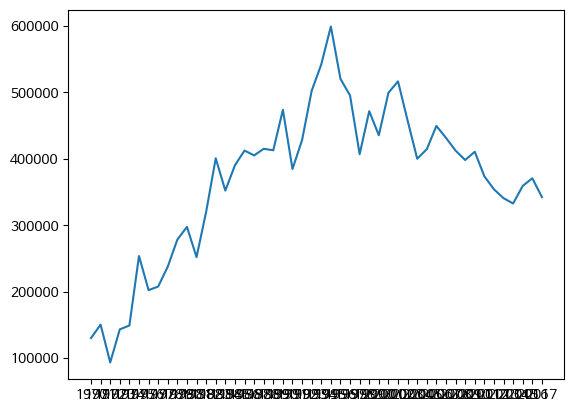

In [ ]:
# x축, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

시리즈 또는 데이터프레임 객체를 `plot()` 함수에 직접 입력하는 것도 가능하다. 다음과 같이 `plt.plot(sr_one)`으로 입력해도 앞의 실행 결과와 같은 값을 얻는다.

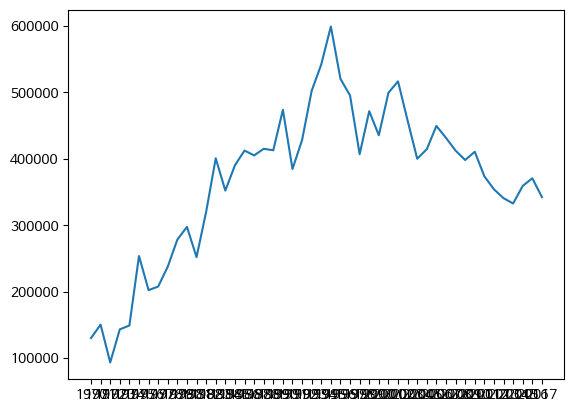

In [ ]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

#### 차트 제목, 축 이름 추가

그래프 객체에 차트 제목을 추가할 때는 `title()` 함수를 사용한다. x축 이름은 `xlabel()` 함수를 이용하고, y축 이름은 `ylabel()` 함수를 활용하여 추가한다.

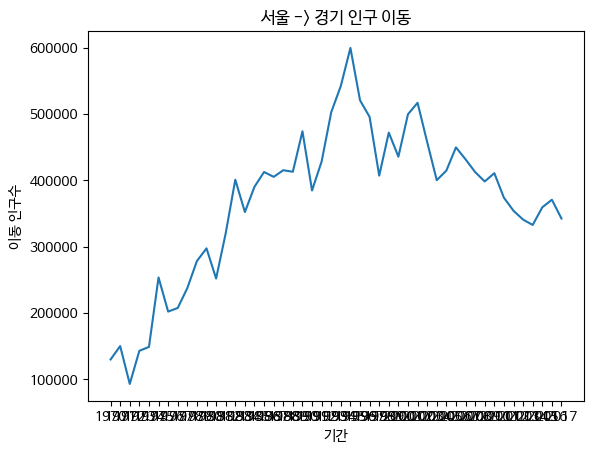

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one=df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() # 변경사항 저장하고 그래프 출력

앞의 실행 결과에서 축 이름과 차트 제목이 제대로 표시되지 않고 네모 박스로 보이는 문제가 있다. 이처럼 Matplotlib에서는 한글을 사용할 때 글자가 깨지는 현상이 발생한다. 그리고 연도를 나타내는 x축 눈금 라벨의 글씨가 서로 겹쳐서 알아볼 수가 없는 문제도 있다.

#### Matplotlib 한글 폰트 오류 해결

오류를 해결하려면 Matplotlib을 사용하는 파이썬 프로그램의 앞부분에 한글 폰트를 지정하는 다음의 코드를 추가한다.

추가 자료 : https://www.whatwant.com/entry/matplotlib-hangul-colab-local

1. 폰트 설치
```
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
```
2. 런타임 재시작
3. 폰트 적용

In [ ]:
# matplotlib 한글 폰트 오류 문제 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

바로 위 코드 제외하고 맨 위로 올라가서 다시 실행시키기

In [ ]:
plt.rc('font', family='NanumBarunGothic')

한글 폰트 문제를 해결하는 코드 추가 후 실행 결과를 보면 차트 제목과 축 이름 등 한글이 정상적으로 출력된다.

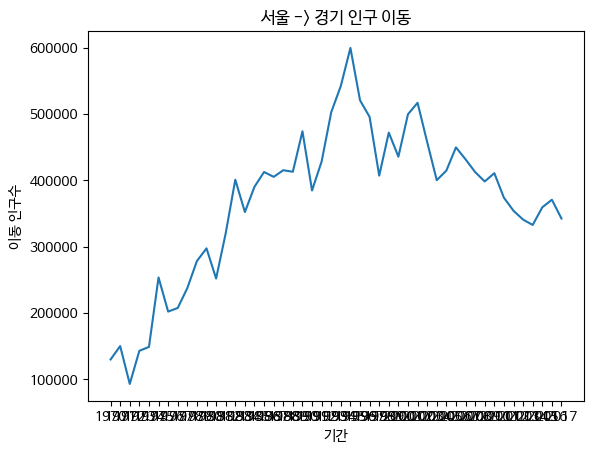

In [ ]:
# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df=df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask=(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one=df_seoul.loc['경기도']

# x축, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() # 변경사항 저장하고 그래프 출력

#### 그래프 꾸미기

x축 눈금 라벨의 글씨가 서로 겹쳐 잘 보이지 않는 문제를 해결하는 방법을 알아보자. 이것은 눈금 라벨이 들어갈 만한 충분한 여유 공간이 없어서 발생하는 문제이다.

다음 예제는 글씨가 들어갈 수 있는 공간을 확보하기 위해 두 가지 방법을 적용한다.
1. 공간을 만들기 위해 figure() 함수로 그림틀의 가로 사이즈를 더 크게 설정한다.
2. xticks() 함수를 활용하여 x축 눈금 라벨을 반시계 방향으로 $90^\circ$ 회전하여 글씨가 서로 겹치지 않게 만든다.

마크다운 수식 참고 : https://khw11044.github.io/blog/blog-etc/2020-12-21-markdown-tutorial2/#%EA%B0%81%EB%8F%84

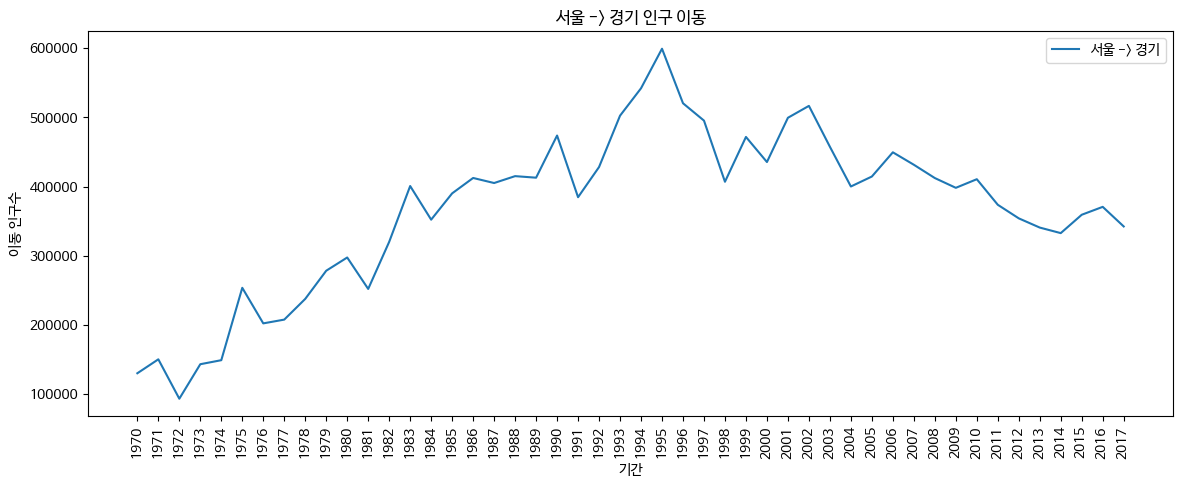

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one=df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x축, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동') # 차트 제목
plt.xlabel('기간')                  # x축 이름
plt.ylabel('이동 인구수')           # y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best') # 범례 표시

plt.show() # 변경사항 저장하고 그래프 출력

실행하면 연도를 나타내는 x축 눈금 라벨이 겹치지 않고 잘 표시된다. 글씨를 회전하기 위해 사용한 `rotation='vertical'` 옵션에 'vertical' 대신 각도를 나타내는 숫자를 입력해도 된다. 예를 들면 rotation=90은 반시계방향으로 $90^\circ$ 회전을 뜻한다.

다음은 Matplotlib의 스타일 서식 지정에 대해 알아보자. 색, 폰트 등 디자인적 요소를 사전에 지정된 스타일로 빠르게 일괄 변경한다. 단, 스타일 서식을 지정하는 것은 Matplotlib 실행 환경 설정을 변경하는 것이므로 다른 파일을 실행할 때도 계속 적용되는 점에 유의한다.

'ggplot'이라는 스타일 서식을 지정한다. x축 눈금 라벨을 지정하는 xticks() 함수에 size=10 옵션을 추가하여 폰트 크기를 10으로 설정한다. plot() 함수에 marker='o' 옵션을 추가하면 원 모양의 점을 마커로 표시한다. markersize=10은 마커 사이즈를 10으로 설정하는 옵션이다.

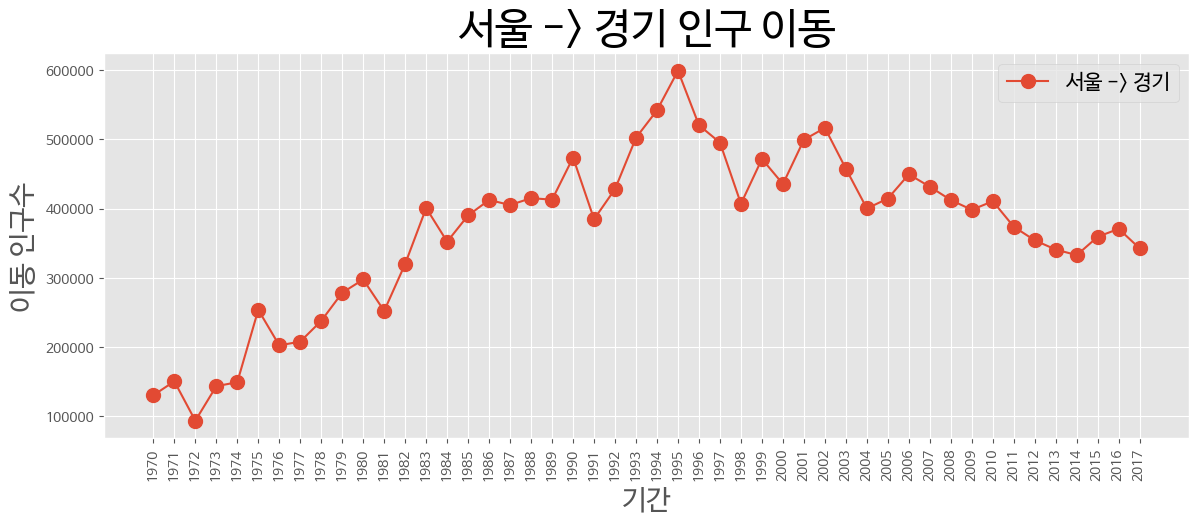

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one=df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x축, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30) # 차트 제목
plt.xlabel('기간', size=20)                  # x축 이름
plt.ylabel('이동 인구수', size=20)           # y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15) # 범례 표시

plt.show() # 변경사항 저장하고 그래프 출력

* Matplotlib 스타일 서식의 종류

'ggplot' 외에도 많은 종류의 스타일 서식이 지원된다.

스타일의 종류 : 'classic', 'bmh', 'dark_background', 'fast', 'grayscale', 'seaborn' 등

현재 실행환경에서 사용 가능한 Matplotlib의 스타일 옵션을 확인할 수 있다. 각자 원하는 스타일을 선택하여 그래프에 적용해 본다. 기본 디폴트 상태로 돌아가려면 스파이더(IDE)를 다시 실행한다.

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


참조 : https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

**그래프에 대한 설명을 덧붙이는 주석**에 대해 알아보자. annotate() 함수를 사용한다. 주석 내용(텍스트)을 넣을 위치와 정렬 방법 등을 annotate() 함수에 함께 전달한다. arraowprops 옵션을 사용하면 텍스트 대신 화살표가 표시된다. 화살표 스타일, 시작점과 끝점의 좌표를 입력한다.

주석을 넣을 여백 공간을 충분히 확보하기 위해 ylim() 함수를 사용하여 y축 범위를 먼저 늘려준다. 그리고 annotate() 함수로 화살표와 텍스트 위치를 잡아서 배치한다. 위치를 나타내는 (x, y) 좌표에서 x값은 인덱스 번호를 사용한다. y 좌표값에 들어갈 인구수 데이터는 숫자값이므로 그대로 사용할 수 있다. xy=(20, 620000)은 인덱스 번호 20을 x값으로 하고 620000명을 y값으로 한다는 뜻이다.

annotate() 함수의 rotation 옵션에서 양(+)의 회전 방향은 반시계방향이다. 글자를 위아래 세로 방향으로 정렬하는 va 옵션은 'center', 'top', 'bottom', 'baseline'이 있다. 좌우 가로 방향으로 정렬하는 ha 옵션에는 'center', 'left', 'right'가 있다.

참조 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html

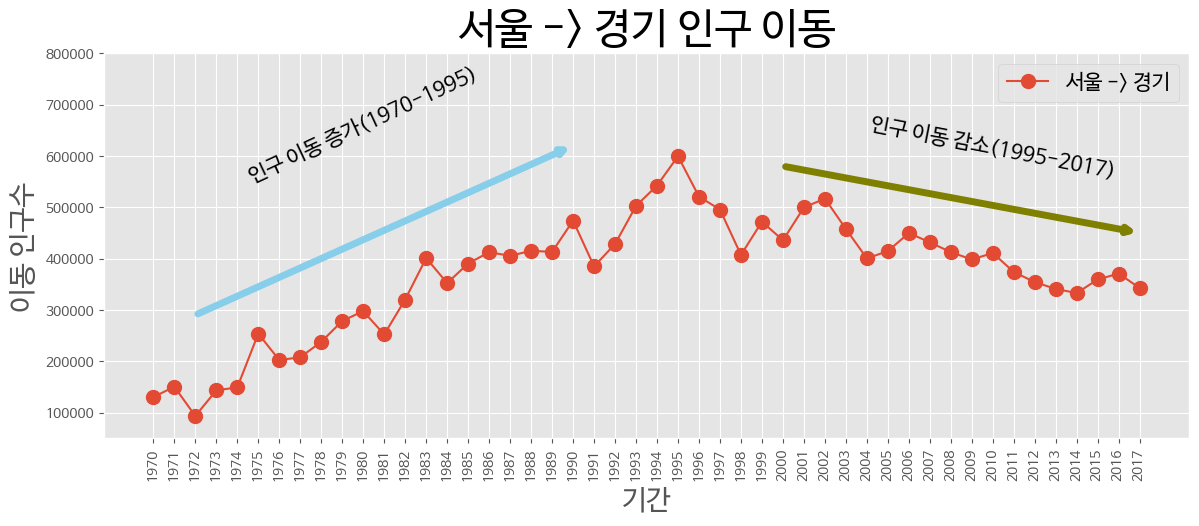

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one=df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x축, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30) # 차트 제목
plt.xlabel('기간', size=20)                  # x축 이름
plt.ylabel('이동 인구수', size=20)           # y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15) # 범례 표시

# y축 범위 지정(최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),                                         # 화살표의 머리 부분(끝점)
             xytext=(2, 290000),                                      # 화살표의 꼬리 부분(시작점)
             xycoords='data',                                         # 좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), # 화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),                                         # 화살표의 머리 부분(끝점)
             xytext=(30, 580000),                                      # 화살표의 꼬리 부분(시작점)
             xycoords='data',                                         # 좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5), # 화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)', # 텍스트 입력
             xy=(10, 550000),             # 텍스트 위치 기준점
             rotation=25,                 # 텍스트 회전 각도
             va='baseline',               # 텍스트 상하 정렬
             ha='center',                 # 텍스트 좌우 정렬
             fontsize=15,                 # 텍스트 크기
             )

plt.annotate('인구 이동 감소(1995-2017)', # 텍스트 입력
             xy=(40, 560000),             # 텍스트 위치 기준점
             rotation=-11,                # 텍스트 회전 각도
             va='baseline',               # 텍스트 상하 정렬
             ha='center',                 # 텍스트 좌우 정렬
             fontsize=15,                 # 텍스트 크기
             )

plt.show() # 변경사항 저장하고 그래프 출력

우리나라 인구의 절반이 산다는 서울특별시와 경기도 간의 인구 이동 변화가 화살표 주석과 함께 선 그래프로 표시된다. 1990년대 중반까지 경기도권 5대 신도시(분당, 일산 등) 개발로 서울 인구의 대규모 경기도 유입이 있었음을 추정할 수 있다. 이 시기를 정점으로 서울을 벗어나 경기권으로 이동하는 인구는 현재까지 계속 감소하는 트렌드를 보이고 있다.

#### 화면 분할하여 그래프 여러 개 그리기 - axe 객체 활용

**화면을 여러 개로 분할하고 분할된 각 화면에 서로 다른 그래프를 그리는 방법**이다. **여러 개의 axe 객체를 만들고, 분할된 화면마다 axe 객체를 하나씩 배정한다.** **axe 객체는 각각 서로 다른 그래프를 표현할 수 있다.** **한 화면에서 여러 개의 그래프를 비교하거나 다양한 정보를 동시에 보여줄 때 사용하면 좋다. 단, axe 객체를 1개만 생성하는 경우에는 하나의 그래프만 표시된다.**

`figure()` 함수를 사용하여 그래프를 그리는 그림틀(fig)을 만든다. figsize 옵션으로 (가로, 세로) 그림틀의 크기를 설정한다. **fig 객체에 `add_subplot()` 메소드를 적용하여 그림틀을 여러 개로 분할한다.** **이때 나눠진 각 부분을 axe 객체라고 부른다.**

`add_subplot()` 메소드의 인자에 "행의 크기, 열의 크기, 서브플롯 순서"를 순서대로 입력한다.

`ax1=fig.add_subplot(2, 1, 1)`의 앞의 두 숫자 중에서 2는 행의 개수를 의미하고, 1은 열의 개수를 나타낸다. 즉, fig를 2부분(2행x1열)으로 분할한다는 뜻이다. 3번째 숫자 1은 분할된 2부분(axe 객체) 중에서 1번째 부분(axe 객체)을 나타낸다.

각 axe 객체에 `plot()` 메소드를 적용하여 그래프를 출력한다. 첫 번째 그래프(ax1)에 'o' 옵션을 인자로 전달하여 선을 그리지 않고 점으로만 표시한다. 두 번째 그래프(ax2)에 `marker='o'` 옵션을 사용하여 원 모양의 마커를 가진 선 그래프가 된다. ax2 객체에는 label 옵션을 추가하고 `legend()` 메소드를 적용하여 범례를 표시한다. 또한 y축의 최소값, 최대값 한계를 설정하기 위해 `set_ylin()` 메소드를 사용한다. 여도를 나타내는 x축 눈금 라벨(1970~2017)의 글씨가 서로 겹치지 않도록 `set_xticklabels()` 메소드를 사용하여 글자를 반시계 방향으로 $75^\circ$ 회전시킨다.

<ipython-input-18-0b7aa18f69c7>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
<ipython-input-18-0b7aa18f69c7>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


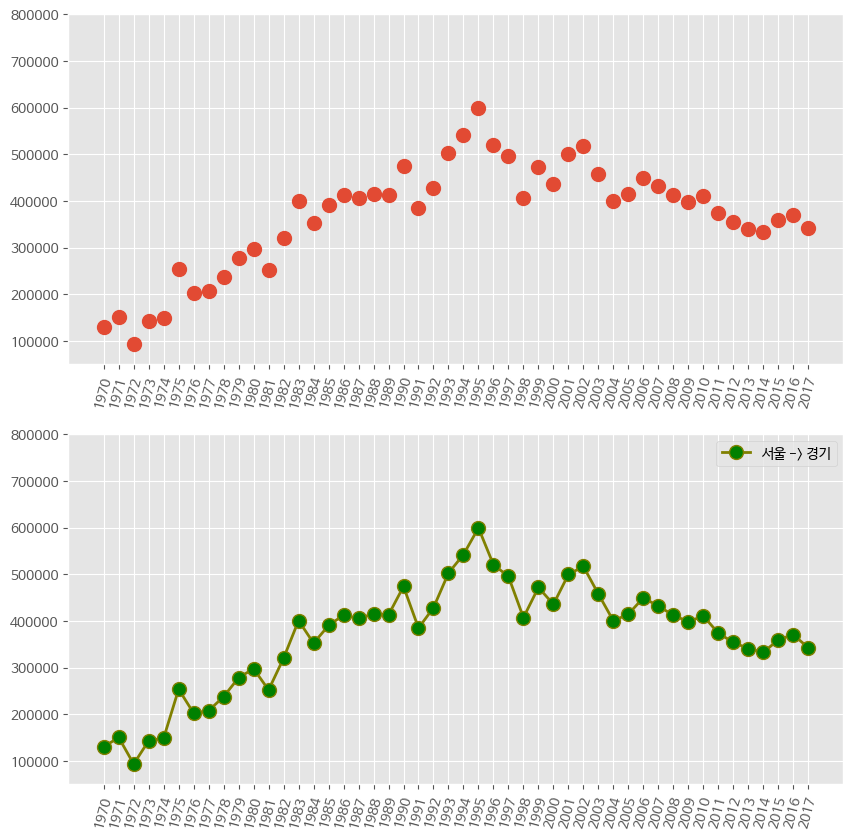

In [ ]:
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig=plt.figure(figsize=(10, 10))
ax1=fig.add_subplot(2, 1, 1)
ax2=fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
         color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show() # 변경사항 저장하고 그래프 출력

* 'o' : 선 그래프가 아니라 점 그래프로 표현
* marker='o' : 마커 모양(예: 'o', '+', '*', '.')
* markerfacecolor='green' : 마커 배경색
* markersize=10 : 마커 크기
* color='olive' : 선의 색
* linewidth=2 : 선의 두께
* label='서울 -> 경기' : 라벨 지정

앞에서 그린 두 번째 그래프에 제목과 축 이름을 추가해보자. 그래프를 1개만 표시하기 위하여 fig.add_subplot(1, 1, 1)과 같이 axe 객체를 1개만 생성하고 변수 ax에 할당한다. 그리고 plot() 메소드를 이용하여 ax 객체에 그래프를 그린다. ax 객체에 set_title() 메소드를 적용하여 제목을 추가한다. set_xlabel() 메소드로 x축 이름을 지정하고, set_ylabel() 메소드로 y축 이름을 지정한다. tick_params() 메소드로 축 눈금 라벨의 크기를 조절한다.

<ipython-input-19-e88aaf8294bc>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


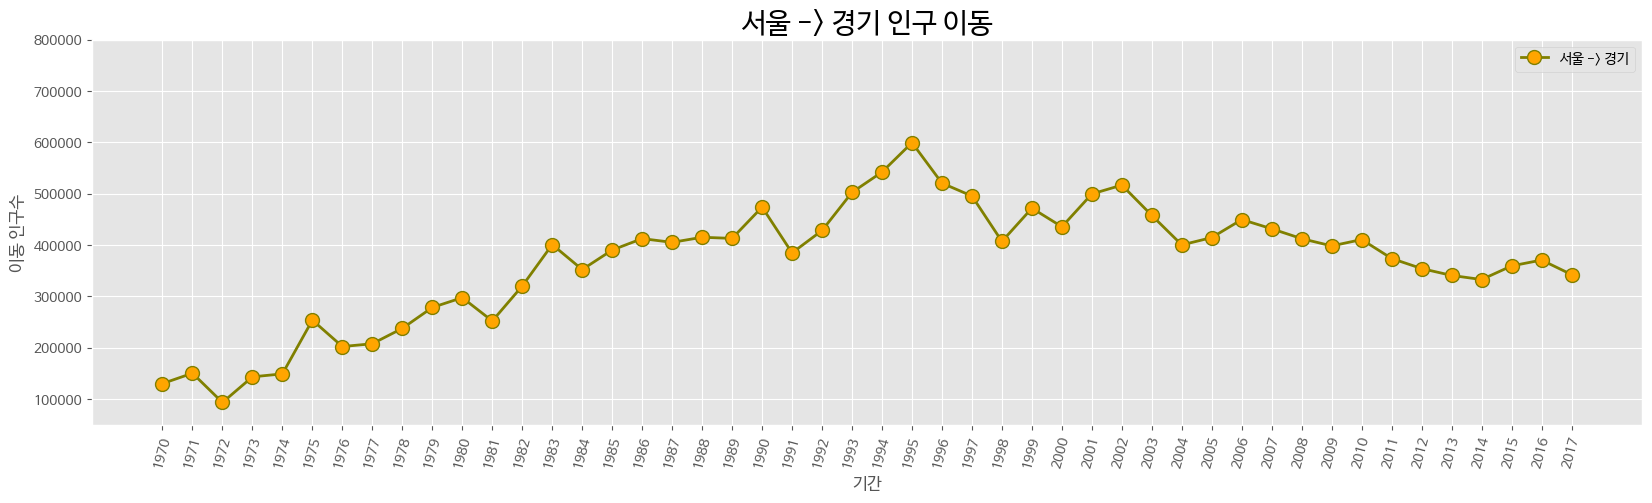

In [ ]:
# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig=plt.figure(figsize=(20, 5))
ax=fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10,
        color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show() # 변경사항 저장하고 그래프 출력

동일한 그림(axe 객체)에 여러 개의 그래프를 추가하는 것도 가능하다.

서울특별시에서 충청남도, 경상북도, 강원도로 이동한 인구 변화 그래프 3개를 하나의 같은 화면에 그려보자. 먼저 각 지역에 해당하는 행을 선택하고, 동일한 axe 객체(ax)에 선 그래프로 출력하는 plot() 메소드를 3번 적용한다. 그리고 범례와 차트 제목 등을 표시한다.

<ipython-input-20-cdff86e3d58e>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


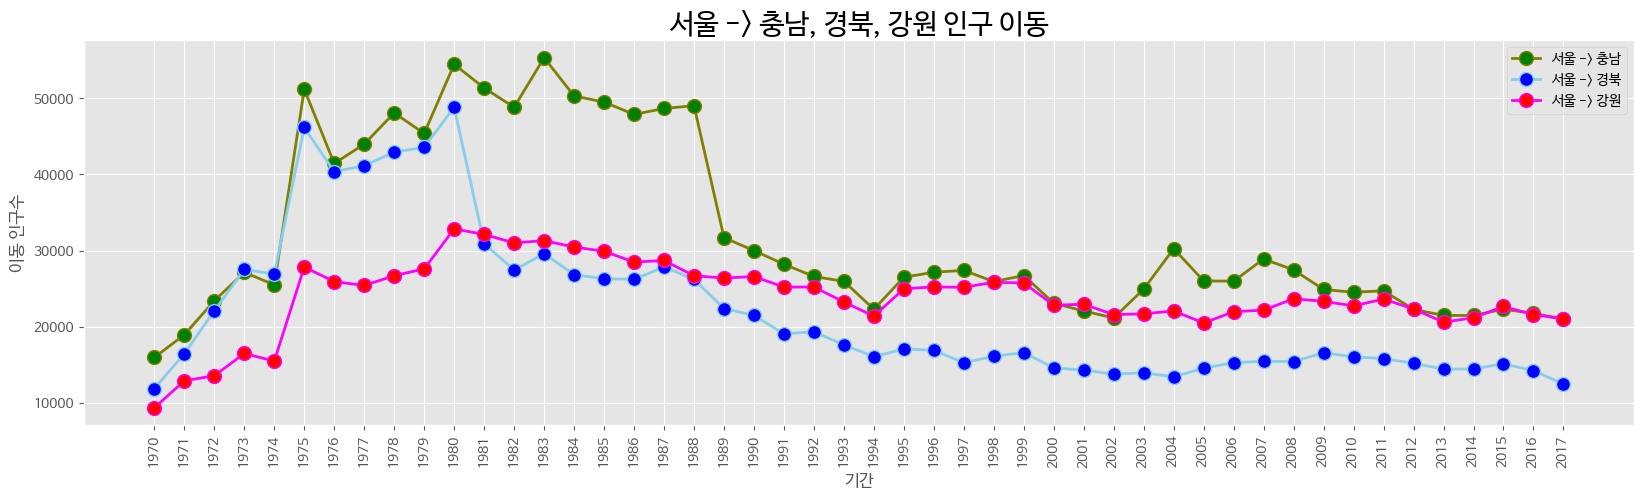

In [ ]:
# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years=list(map(str, range(1970, 2018)))
df_3=df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

# 스타일 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure 1개의 서브 플롯 생성)
fig=plt.figure(figsize=(20, 5))
ax=fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도', :], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도', :], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도', :], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show() # 변경사항 저장하고 그래프 출력

이처럼 같은 axe 객체에 그래프 여러 개를 동시에 표시할 수 있다. 서울에서 서로 다른 3개 지역으로 빠져나간 인구 이동을 비교 파악하기가 쉽다. 특히 지리적으로 가까운 충남 지역으로 이동한 인구가 다른 두 지역에 비해 많은 편이다. 전반적으로 1970~80년대에는 서울에서 지방으로 전출하는 인구가 많았으나, 1990년 이후로는 줄곧 감소하는 패턴을 보이고 있다.

서울특별시에서 충청남도, 경상북도, 강원도, 전라남도 4개 지역으로 이동한 인구 변화 그래프를 그려본다. ax1~ax4까지 4개의 axe 객체를 생성한다. 각 지역에 해당하는 4개의 행을 선택하고, axe 객체에 하나씩 plot() 메소드를 적용한다. 그리고 범례와 차트 제목 등을 표시한다.

<ipython-input-21-86fc26006e0f>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
<ipython-input-21-86fc26006e0f>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
<ipython-input-21-86fc26006e0f>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
<ipython-input-21-86fc26006e0f>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


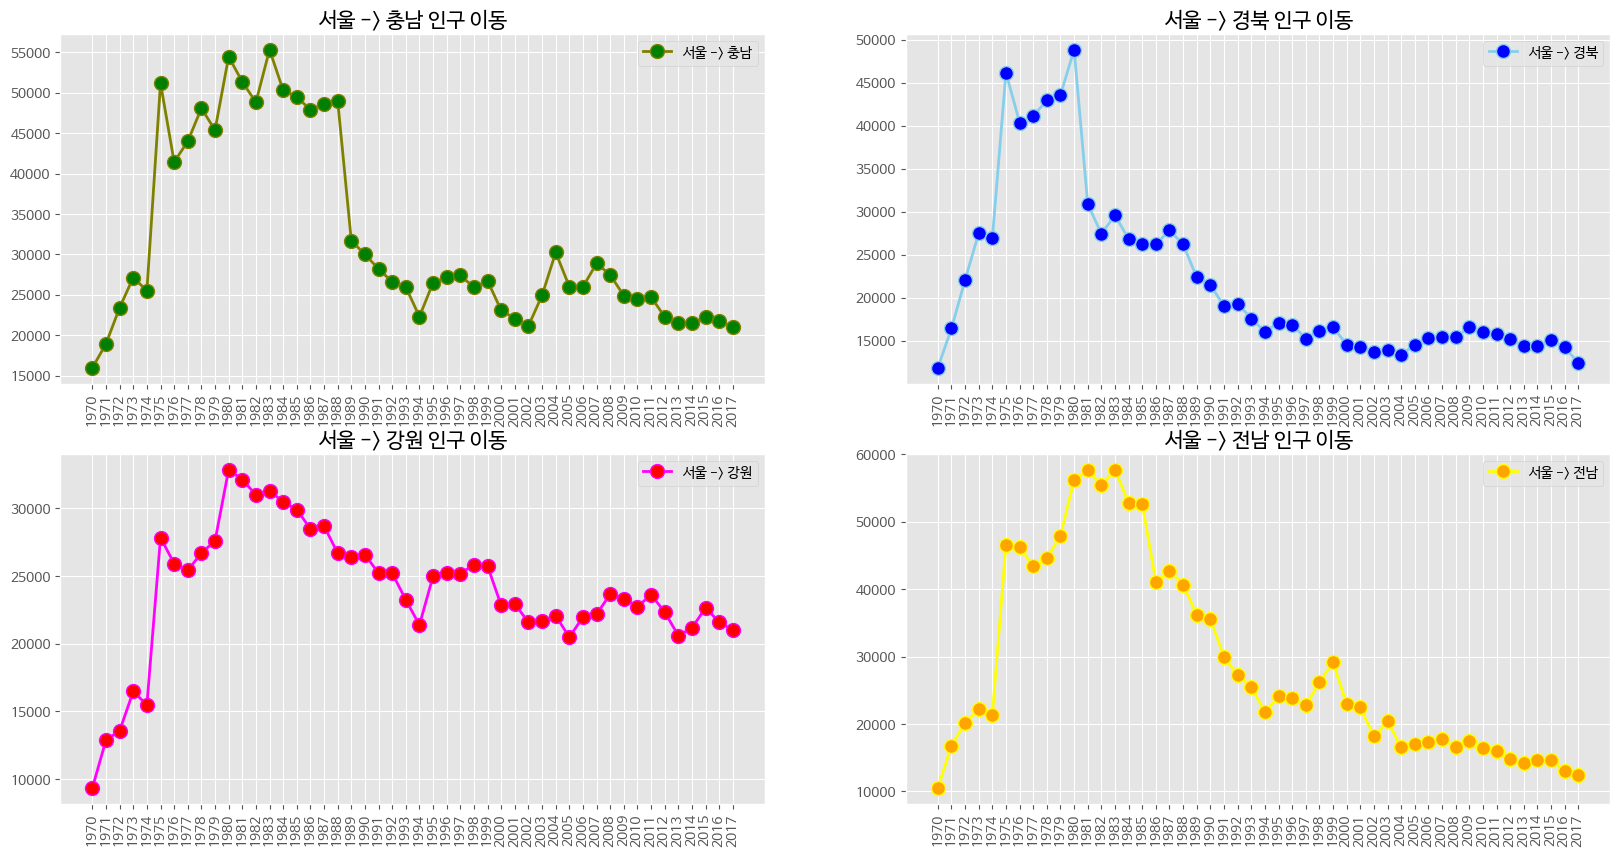

In [ ]:
# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years=list(map(str, range(1970, 2018)))
df_4=df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig=plt.figure(figsize=(20, 10))
ax1=fig.add_subplot(2, 2, 1)
ax2=fig.add_subplot(2, 2, 2)
ax3=fig.add_subplot(2, 2, 3)
ax4=fig.add_subplot(2, 2, 4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도', :], marker='o', markerfacecolor='green',
         markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도', :], marker='o', markerfacecolor='blue',
         markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도', :], marker='o', markerfacecolor='red',
         markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도', :], marker='o', markerfacecolor='orange',
         markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show() # 변경사항 저장하고 그래프 출력

* Matplotlib에서 사용할 수 있는 색의 종류

In [ ]:
# 라이브러리 불러오기
import matplotlib

# 컬러 정보를 담을 빈 딕셔너리 생성
colors={}

# 컬러 이름과 헥사코드 확인하여 딕셔너리에 입력
for name, hex in matplotlib.colors.cnames.items():
    colors[name]=hex

# 딕셔너리 출력
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

### 면적 그래프

면적 그래프(area plot)는 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x축 사이의 공간에 색이 입혀진다. 색의 투명도(alpha)는 기본값 0.5로 투과되어 보인다(투명도 : 0~1 범위).

선 그래프를 그리는 `plot()` 메소드에 `kind='area'` 옵션을 추가하면 간단하게 그릴 수 있다.

그래프를 누적할지 여부를 설정할 수 있는데, 기본값은 `stacked=True` 옵션이다. 각 열의 선 그래프를 다른 열의 선 그래프 위로 쌓아 올리는 방식으로 표현된다. 각 열의 패턴과 함께 열 전체의 합계가 어떻게 변하는지 파악할 수 있게 된다. 따라서, 면적 그래프를 선 그래프를 확장한 개념으로 누적 선 그래프(stacked line plot)라고 부르기도 한다.

`stacked=False` 옵션을 지정하면 각 열의 선 그래프들이 누적되지 않고 서로 겹치도록 표시된다. 선 그래프를 동일한 화면에 여러 개를 그린 것과 같은 결과가 된다.

그래프를 간단하게 그리기 위해 데이터프레임에 바로 `plot()` 메소드를 적용한다. `stacked=False` 옵션을 지정하여 데이터를 누적하지 않는 `unstacked` 버전부터 그려본다. 서로 겹쳐지는 부분이 잘 투과되어 보이도록 `alpha=0.2` 옵션을 적용한다(기본값 : 0.5)

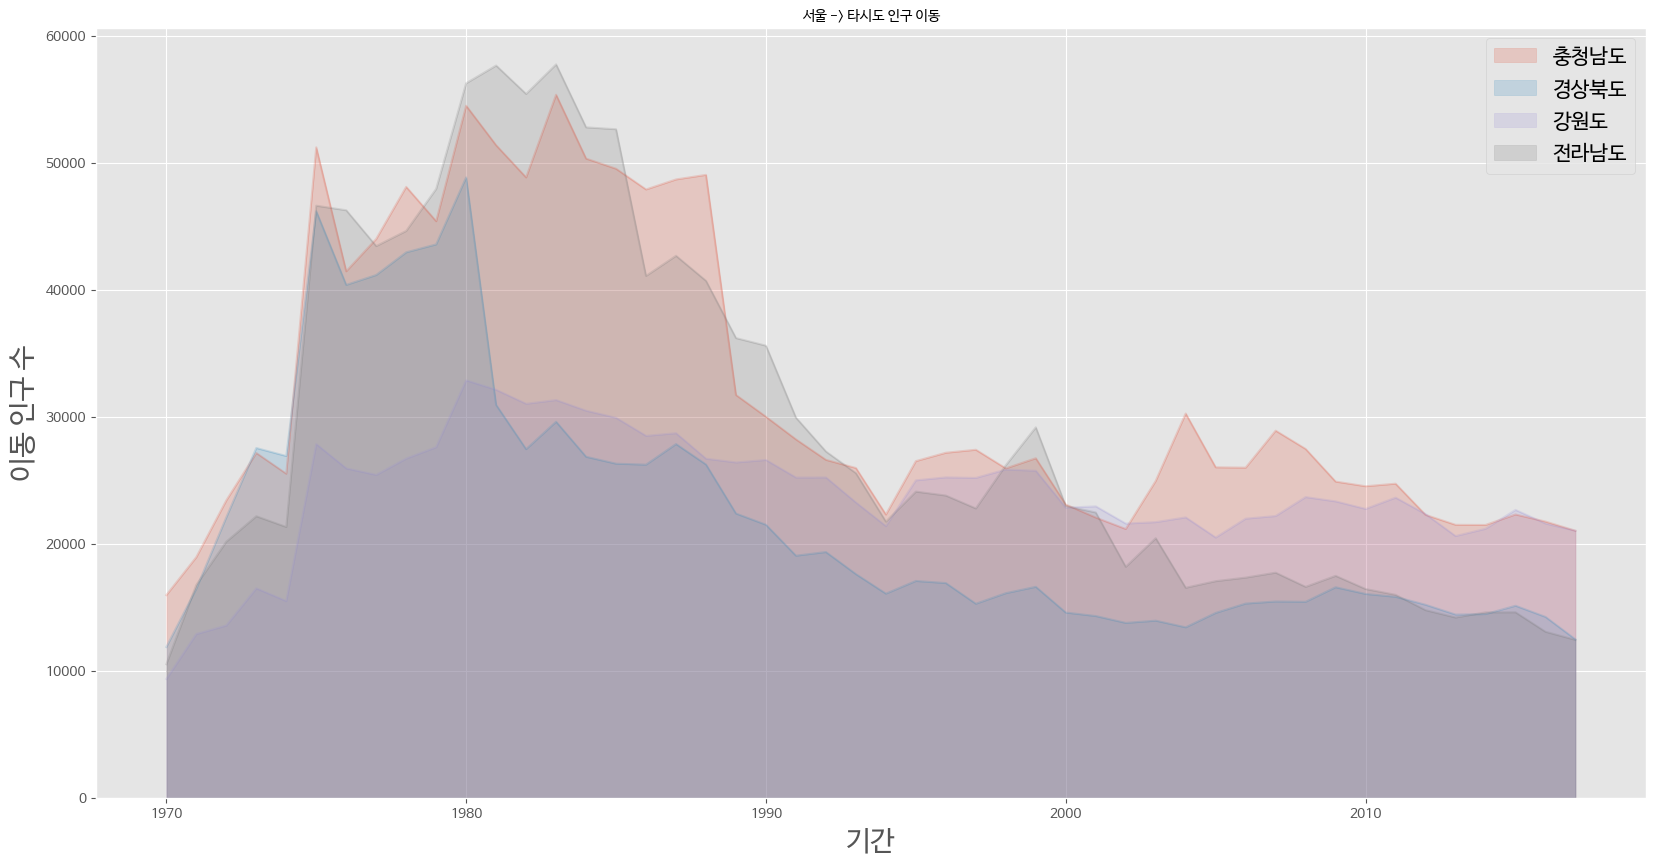

In [ ]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask=(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years=list(map(str, range(1970, 2018)))
df_4=df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4=df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index=df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=10)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

stacked=True 옵션을 지정하여 선 그래프들이 서로 겹치지 않고 위 아래로 데이터가 누적(stacked)되는 면적 그래프를 그려본다.

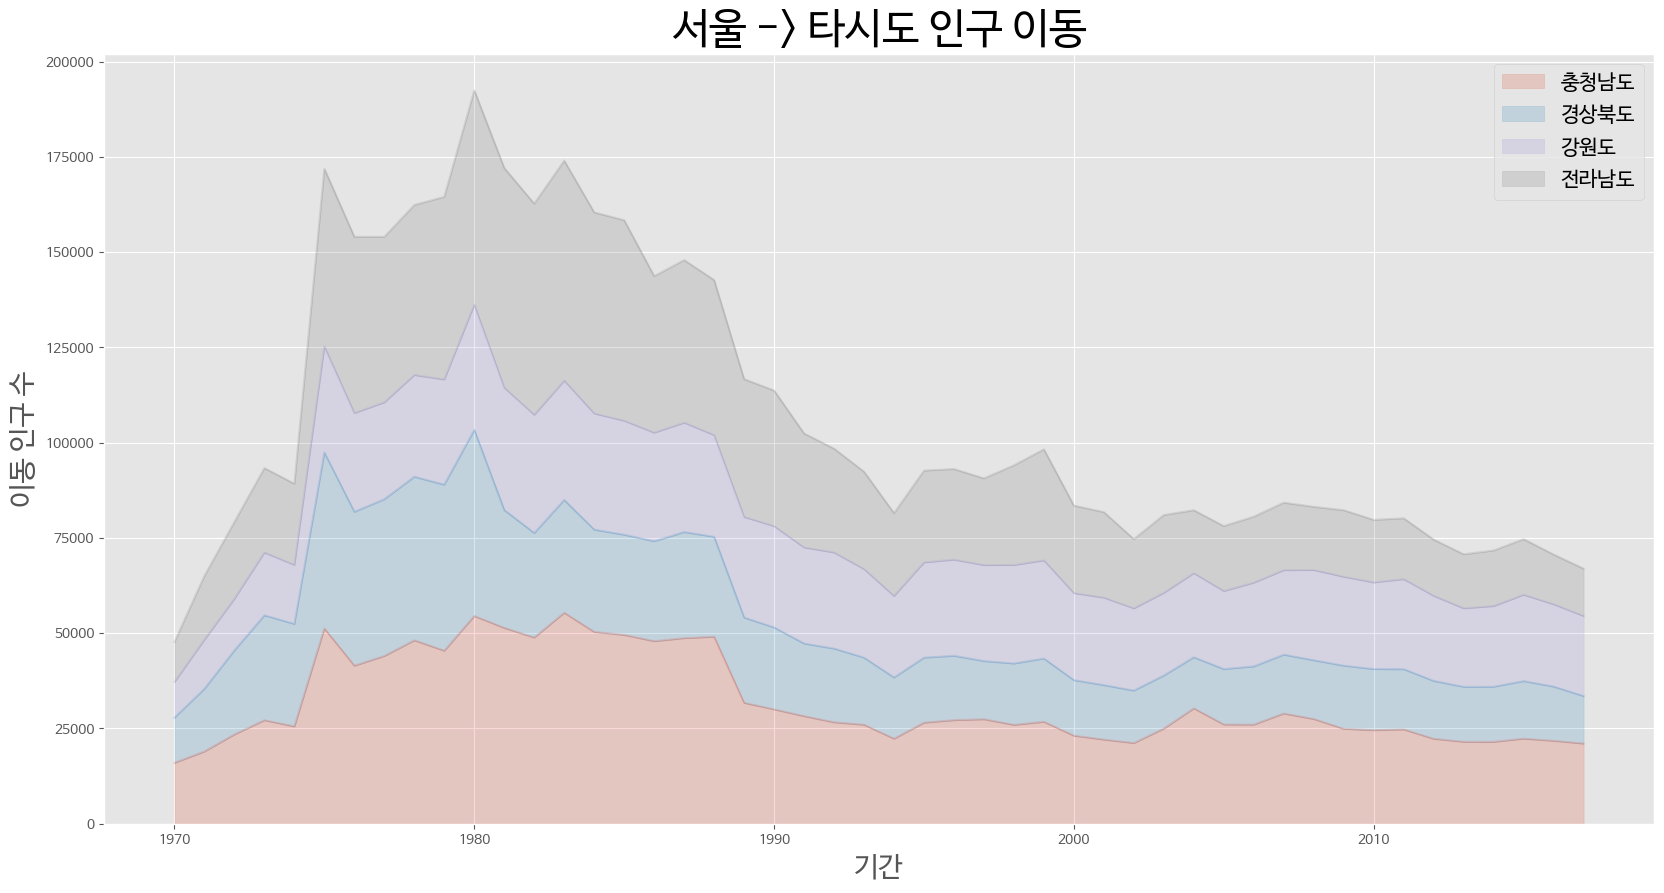

In [ ]:
# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index=df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

앞에서 `plot()` 메소드로 생성한 그래프는 axe 객체이다. 다음과 같이 axe 객체(ax)의 세부적인 요소를 설정할 수 있다. axe 객체의 속성을 이용하여 제목, 축 이름 등을 설정한다.

<class 'matplotlib.axes._axes.Axes'>


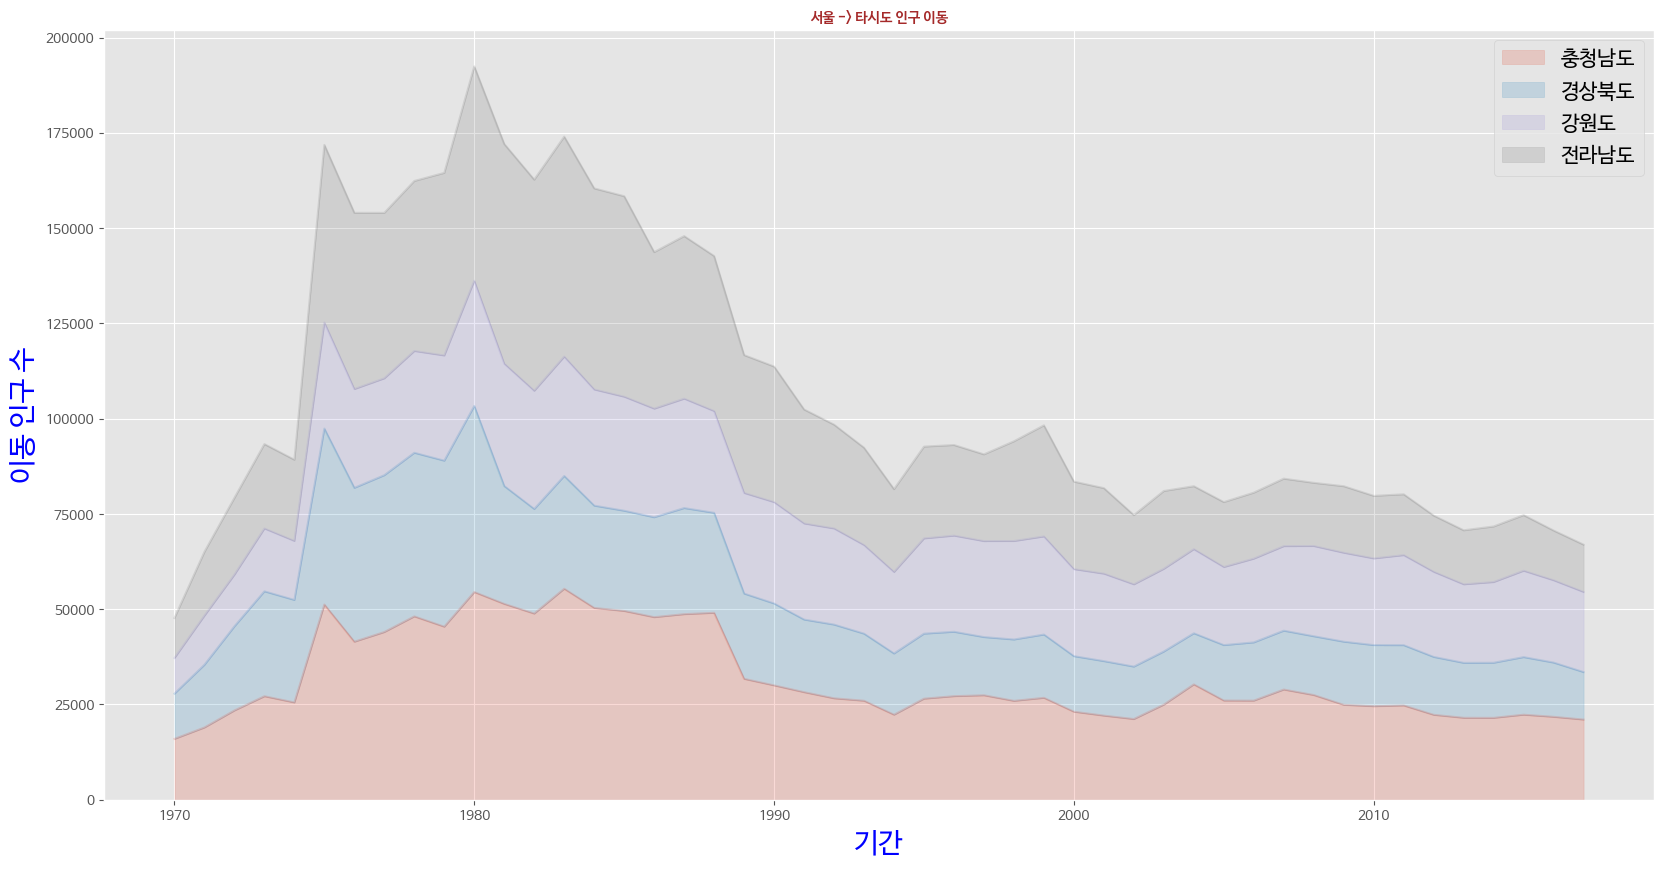

In [ ]:
# 데이터 프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index=df_4.index.map(int)

# 면적 그래프 axe 객체 생성
ax=df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size=10, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

### 막대 그래프

막대 그래프(bar plot)는 데이터 값의 크기에 비례하여 높이을 갖는 직사각형 막대로 표현한다. 막대 높이의 상대적 길이 차이를 통해 값의 크고 작음을 설명한다. 세로형과 가로형 막대 그래프 두 종류가 있다. 다만, 세로형의 경우 정보 제공 측면에서 보면 선 그래프와 큰 차이가 없다.

세로형 막대 그래프는 시간적으로 차이가 나는 두 점에서 데이터 값의 차이를 잘 설명한다. 즉, 시계열 데이터를 표현하는데 적합하다. plot() 메소드에 kind='bar' 옵션을 입력한다.

2010~2017년에 해당하는 데이터를 추출하기 위해, col_years 변수에 저장하는 값의 범위를 변경한다. plot() 메소드의 color 옵션을 추가하여 막대 색상을 다르게 설정한다.

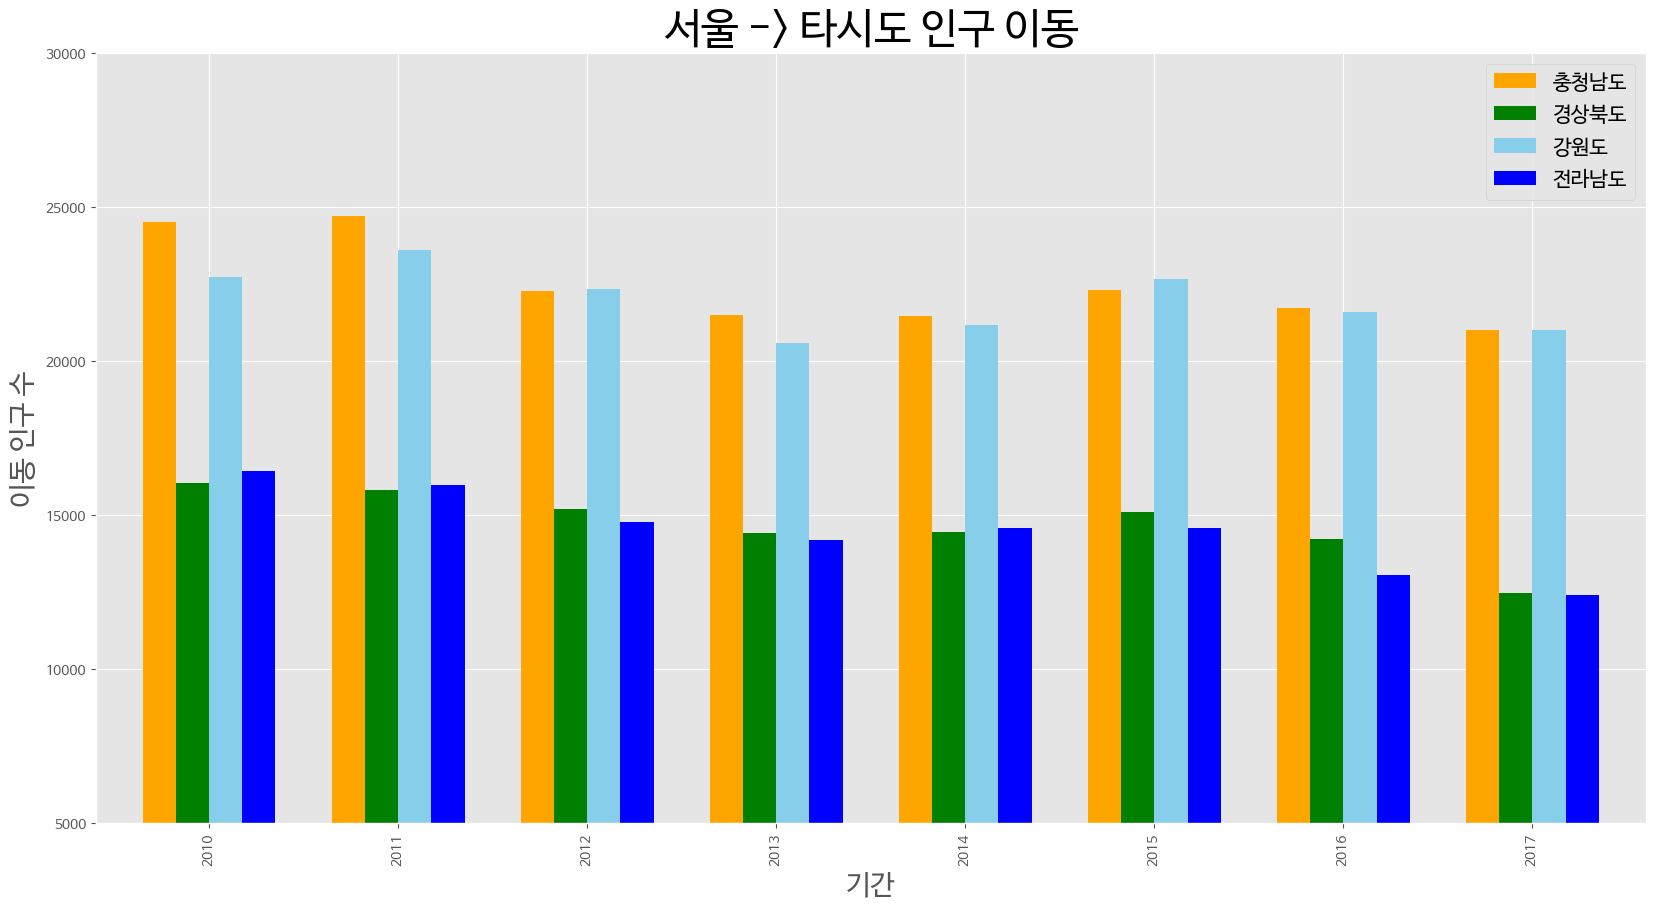

In [ ]:
# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years=list(map(str, range(2010, 2018)))
df_4=df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4=df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index=df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

가로형 막대 그래프는 각 변수 사이 값의 크기 차이를 설명하는데 적합하다. plot() 메소드의 옵션으로 kind='barh'를 입력한다. 다음의 예제에서는 2010~2017년의 기간 동안 서울에서 각 시도로 이동한 인구의 합계를 구하여 시도별로 비교하는 그래프를 그린다.

In [ ]:
# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years=list(map(str, range(2010, 2018)))
df_4=df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계']=df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total=df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

NameError: name 'df_seoul' is not defined

2010~2017년에 이동 인구 합계를 기준으로 서울에서 충청남도로 이동한 사람이 제일 많다. 다음으로 강원도, 경상북도, 전라남도 순으로 나타난다.

* 보조 축 활용하기(2축 그래프 그리기)

지금까지 그래프를 그릴 때 y축을 한 개만 사용하였다. Excel에서 차트를 그릴 때처럼 보조 축을 추가하여 2개의 y축을 갖는 그래프를 그릴 수 있다.

남북한 발전량 데이터셋을 사용하여 보조 축을 설정하는 방법을 살펴보자. 자료실에서 Excel 파일을 다운로드 받아 파이썬 파일과 같은 폴더에 저장한다. 기존 축에는 막대 그래프의 값을 표시하고 보조 축에는 선 그래프의 값을 표시한다. 막대 그래프는 연도별 북한의 발전량을 나타내고 선 그래프는 북한 발전량의 전년 대비 증감률을 백분률로 나타낸다.

증감률을 계산하기 위해 rename() 메소드로 '합계'열의 이름을 '총발전량'으로 바꾸고, shift() 메소드를 이용하여 '총발전량' 열의 데이터를 1행씩 뒤로 이동시켜서 '총발전량-1년' 열을 새로 생성한다. 그리고 두 열의 데이터를 이용하여 전년도 대비 변동율을 계산한 결과를 '증감률' 열에 저장한다.

ax1 객체는 막대 그래프에 stacked=True 옵션을 지정하여, '수력', '화력' 열의 값을 아래 위로 쌓은 형태의 세로형 막대 그래프를 그린다. ax1 객체에 twinx() 메소드를 적용하여 ax1 객체의 쌍둥이 객체를 만들고, 쌍둥이 객체를 ax2 변수에 저장한다. ax2 객체에 plot() 메소드를 적요앟여 선 그래프를 그린다. 그래프를 그리는데 사용할 데이터는 '증감률' 열에서 가져온다. ls='--' 옵션은 선 스타일(line style)을 점선으로 설정하는 명령이다.

<ipython-input-34-7fe1737a8542>:5: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df=pd.read_excel('/content/남북한발전전력량.xlsx', engine='openpyxl', convert_float=True)


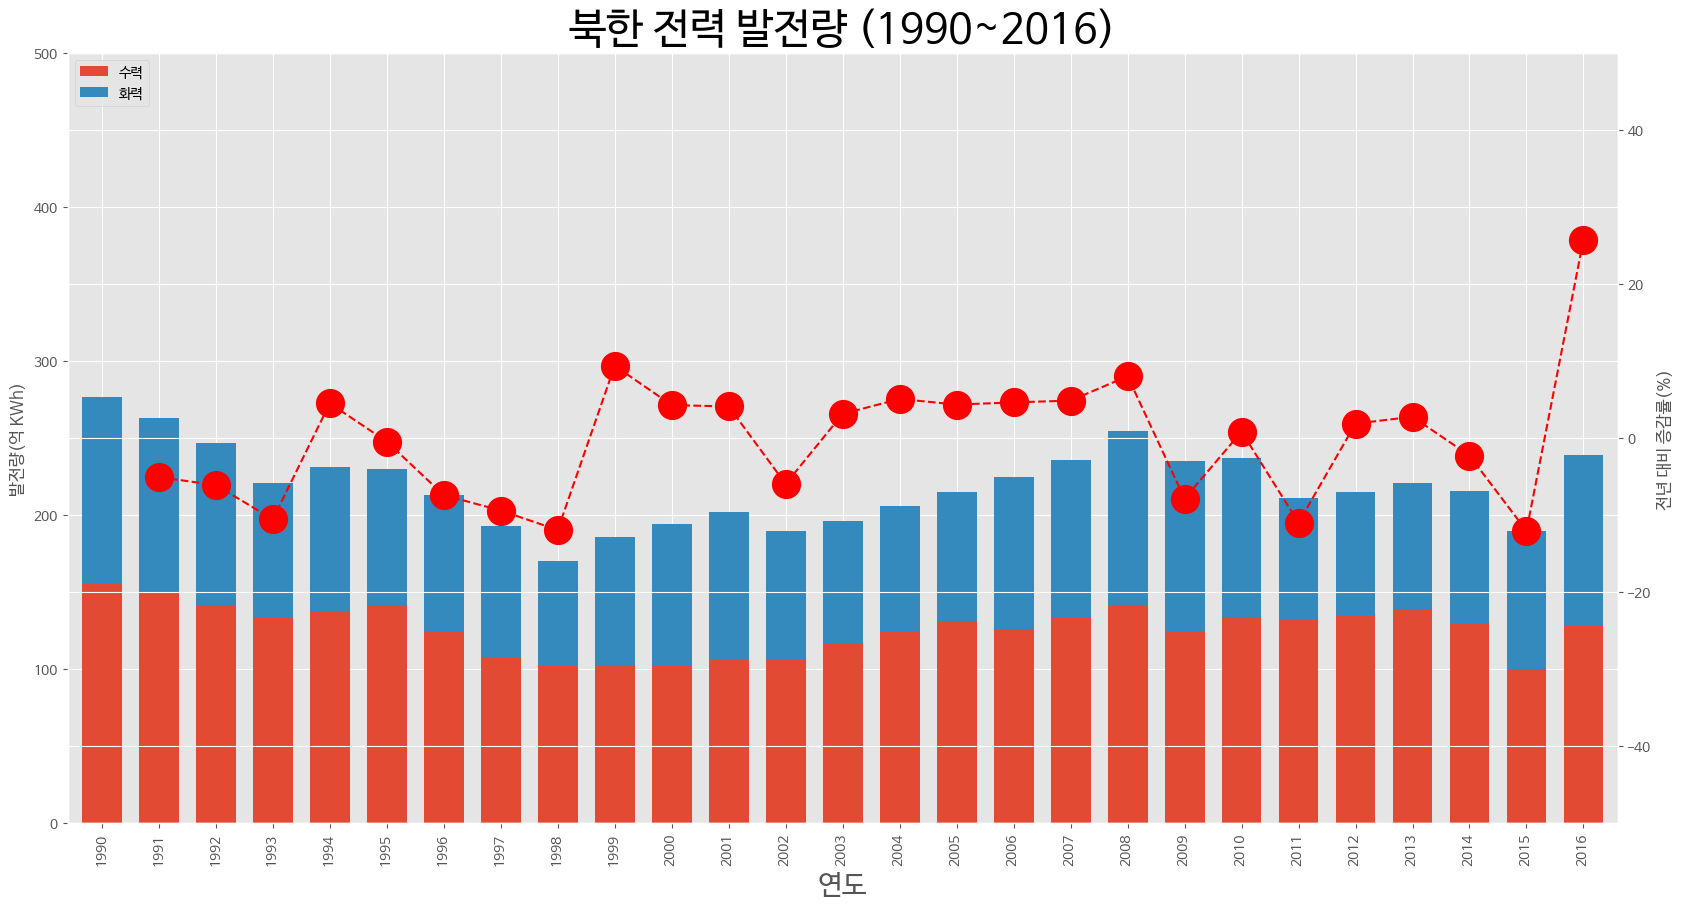

In [ ]:
plt.style.use('ggplot')                  # 스타일 지정
plt.rcParams['axes.unicode_minus']=False # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임으로 변환
df=pd.read_excel('/content/남북한발전전력량.xlsx', engine='openpyxl', convert_float=True)
df=df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df=df.T

# 증감률(변동률) 계산
df=df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년']=df['총발전량'].shift(1)
df['증감률']=((df['총발전량']/df['총발전량 - 1년'])-1)*100

# 2축 그래프 그리기
ax1=df[['수력', '화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2=ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20,
         color='red', label='전년대비 증감률(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990~2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

2015년 수력 발전량이 일시적으로 급감한 사실이 있다. 기사를 검색해 보면 2015년에 북한의 가뭄이 심했다는 뉴스를 찾아볼 수 있다.

### 1-4. 히스토그램

히스토그램(histogram)은 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현한다. x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수(빈도)를 y축에 표시한다. 구간을 나누는 간격의 크기에 따라 빈도가 달라지고 히스토그램의 모양이 변한다.

앞에서 다룬 UCI 자동차 연비 데이터셋을 사용한다. 자료실에서 CSV 파일을 다운로드 받는다. plot() 메소드에 kind='hist' 옵션을 넣고, bins=10 옵션을 지정하여 10개 구간으로 나눈다. 실행 결과를 보면, 자동차 연비 값은 대부분 좌측으로 편향되어 있어서 연비가 낮은 구간에 집중되어 있는 경향을 보인다.

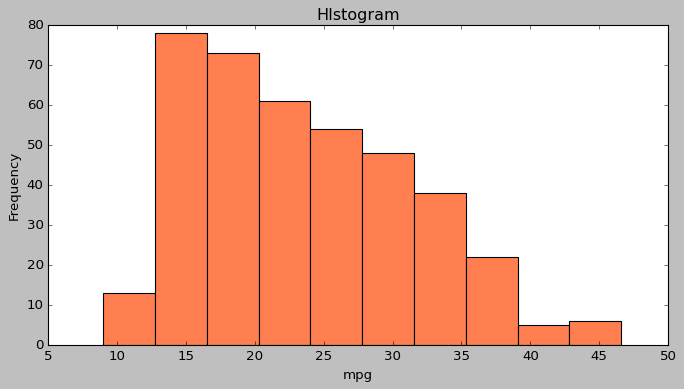

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic') # 스타일 서식 저장

# read.csv() 함수로 df 생성
df=pd.read_csv('/content/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
            'acceleration', 'model year', 'origin', 'name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

# 그래프 꾸미기
plt.title('HIstogram')
plt.xlabel('mpg')

plt.show()

### 1-5. 산점도

산점도(scatter plot)는 서로 다른 두 변수 사이의 관계를 나타낸다. 이때 각 변수는 연속되는 값을 갖는다. 일반적으로 정수형(int64) 또는 실수형(float64) 값이다. 2개의 연속 변수를 각각 x축과 y축에 하나씩 놓고, 데이터 값이 위치하는 (x, y) 좌표를 찾아서 점으로 표시한다.

두 연속 변수의 관계를 보여준다는 점에서 선 그래프와 비슷하다. 선 그래프를 그릴 때 `plot()` 메소드에 'o' 옵션을 사용하면 선 없이 점으로만 표현되는데, 사실상 산점도라고 볼 수 있다.

`plot()` 메소드에 `kind='scatter'` 옵션을 사용하여 산점도를 그린다. `x='weight'` 옵션을 사용하여 x축에 위치할 변수(데이터프레임의 열)를 선택한다. 마찬가지로 `y='mpg'` 옵션을 가정하여 'mpg' 열을 y축에 놓을 변수로 선택한다. 점의 색상(c)과 크기(s)를 설정하는 옵션을 추가한다.

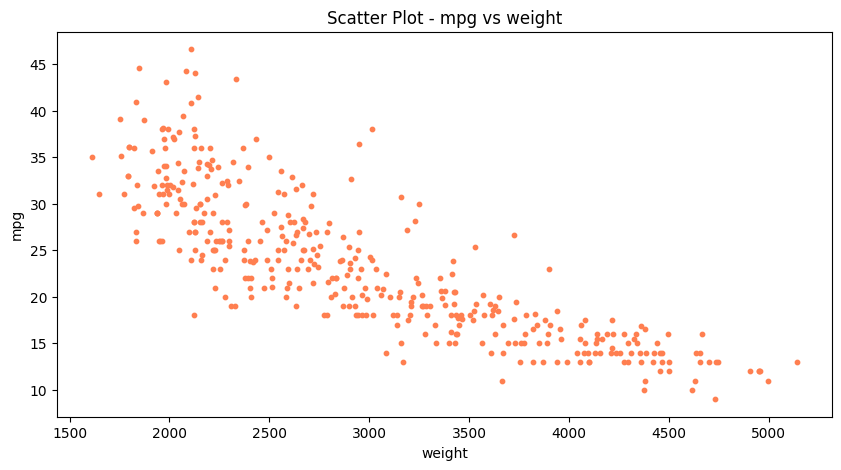

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default') # 스타일 지정

# read_csv() 함수로 df 생성
df=pd.read_csv('/content/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
            'acceleration', 'model year', 'origin', 'name']

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs weight')

plt.show()

앞에서 자동차 무게와 연비 사이의 관계를 산점도로 표현하였다. 여기에 새로운 변수를 추가해서 점의 크기 또는 색상으로 표현할 수 있다. 여기서는 3번째 변수로 실린더 개수('cylinders' 열)를 추가해 보자.

실린더 개수를 나타내는 정수를 그대로 쓴느 대신, 해당 열의 최대값 대비 상대적 크기를 나타내는 비율을 계산하여 cylinders_size 변수에 저장한다. cylinders_size는 0~1 범위의 실수 값의 배열(시리즈)이다. 점의 크기를 정하는 s 옵션에 cylinders_size를 입력하여 값의 크기에 따라 점의 크기를 값에 따라 다르게 표시한다. 이처럼 점의 크기에 변화를 주면 모양이 비눗방울 같다고 해서 버블(bubble) 차트라고 부르기도 한다.

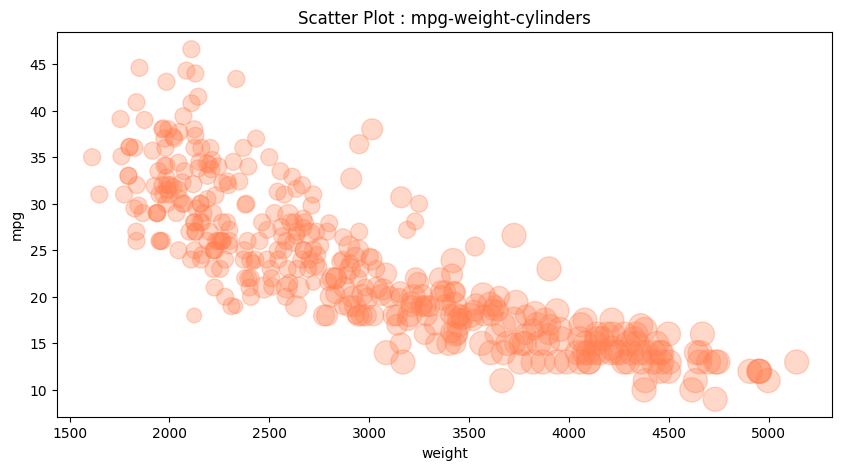

In [ ]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size=df.cylinders/df.cylinders.max()*300

# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)

plt.title('Scatter Plot : mpg-weight-cylinders')

plt.show()

* 그래프를 그림 파일로 저장

Matplotlib 라이브러리로 생성한 그래프를 그림 파일로 저장하는 방법이다. savefig() 함수에 저장하려는 파일의 이름과 파일 경로를 설정한다. 앞에서 그린 산점도를 "scatter.png"라는 파일명으로 저장한다. 그리고 이와 별도로 transparent=True 옵션으로 그림 배경을 투명하게 지정하여 :scatter_trasparent.png"라는 파일명으로 저장한다.

여기서는 marker='+' 옵션으로 점의 모양을 십자(+)로 표시한다. c 옵션에 cylinders_size를 할당하여 값에 따라 다른 색상으로 표현한다. 색상을 정하는 컬러맵(cmap)으로 'viridis' 옵션을 사용한다.

컬러맵 참조 사이트 : http://matplotlib.org/tutorials/colors/colormaps.html

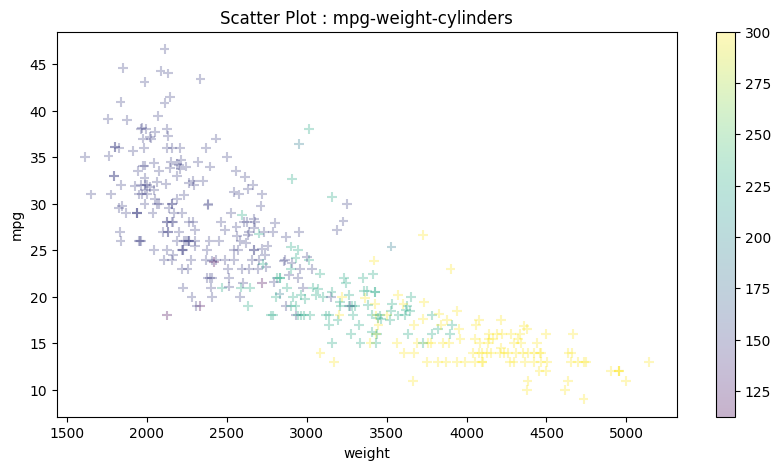

In [ ]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size=df.cylinders/df.cylinders.max()*300

# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot : mpg-weight-cylinders')

plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)

plt.show()

콘솔에 그래프가 표시되고, 파이썬 실행 파일이 위치한 폴더에 2개의 그림 파일이 저장된다. 이미지 편집 프로그램으로 그림 파일을 열어서 배경색이 투명한지 확인해 보자.

### 1-6. 파이 차트

파이 차트(pie chart)는 원을 파이 조각처럼 나누어서 표현한다. 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례한다. plot() 메소드에 kind='pie' 옵션을 사용하여 그린다.

예제에서는 데이터 개수를 세기 위해 숫자 1을 원소로 갖는 'count' 열을 먼저 만든다. 그리고 g`roupby()` 메소드를 사용하여 데이터프레임 df의 모든 데이터를 'origin' 열 값인 '1'(=USA), '2'(=EU), '3'(=JPN)을 기준으로 3개의 그룹으로 나눈다. sum() 메소드로 각 그룹별 합계를 집계하여 df_origin 변수에 저장한다. 그룹 연산에 대해서는 [Part 6]에서 다룬다.

각 제조국가별로 데이터 값들의 합계가 계산되는데, 우리가 필요한 데이터는 'count' 열이다. 여기에 plot() 메소드를 적용하면 국가별 점유율을 나타내는 파이 차트를 그린다. '%1.1f%%' 옵션은 숫자를 퍼센트(%)로 나타내는데, 소수점 이하 첫째자리까지 표기한다는 뜻이다.

<ipython-input-40-ea7e08e3e9e3>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_origin=df.groupby('origin').sum() # origin 열을 기준으로 그룹화, 합계 연산


           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


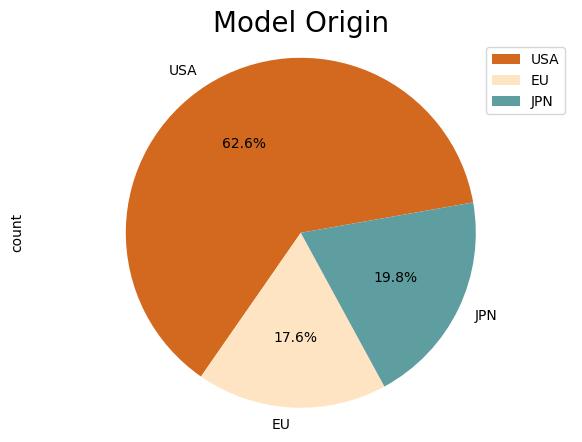

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default') # 스타일 서식 지정

# read_csv() 함수로 df 생성
df=pd.read_csv('/content/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
            'acceleration', 'model year', 'origin', 'name']

# 데이터 개수 카운트를 위해 값 1을 가진 열 추가
df['count']=1
df_origin=df.groupby('origin').sum() # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index=['USA', 'EU', 'JPN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind='pie',
                        figsize=(7, 5),
                        autopct='%1.1f%%',                          # 퍼센트 % 표시
                        startangle=10,                              # 파이 조각을 나누는 시작점(각도 표시)
                        colors=['chocolate', 'bisque', 'cadetblue'] # 색상 리스트
                        )

plt.title('Model Origin', size=20)
plt.axis('equal')                                     # 파이 차트의 비율을 길게(원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right') # 범례 표시

plt.show()

### 1-7. 박스 플롯

박스 플롯(boxplot)은 범주형 데이터의 분포를 파악하는데 적합하다. 박스 플롯은 5개의 통계 지표(최소값, 1분위값, 중간값, 3분위값, 최대값)를 제공한다.

다음의 예제에서 제조국가별 연비 분포를 보여주는 박스 플롯을 그린다. figure() 함수로 생성하는 그림틀의 크기는 figsize=(15, 5) 옵션을 사용하여 가로 15, 세로 5로 설정한다. 그림틀을 2개의 axe 객체로 분할하기 위해 add_subplot() 메소드를 적용한다. 각각 ax1, ax2 변수에 저장한다.

각 axe 객체에 박스 플롯을 그리는 boxplot() 메소드를 적용한다. 'origin' 값이 1인 'mpg' 열, 'origin' 값이 2인 'mpg' 열, 'origin' 값이 3인 'mpg' 열의 데이터 분포를 출력한다. 박스 플롯에 넣을 열 3개를 리스트에 담아서 x 옵션에 할당한다. labels 옵션을 이용하여 각 열을 나타내는 라벨을 정의한다. 화면 오른쪽 ax2 객체에 vert=False 옵션을 사용하여 수평 박스 플롯을 그린다.

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# matplotlib 한글 폰트 오류 문제 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumBarunGothic')

<ipython-input-3-3ecc263f44da>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster') # 스타일 서식 지정


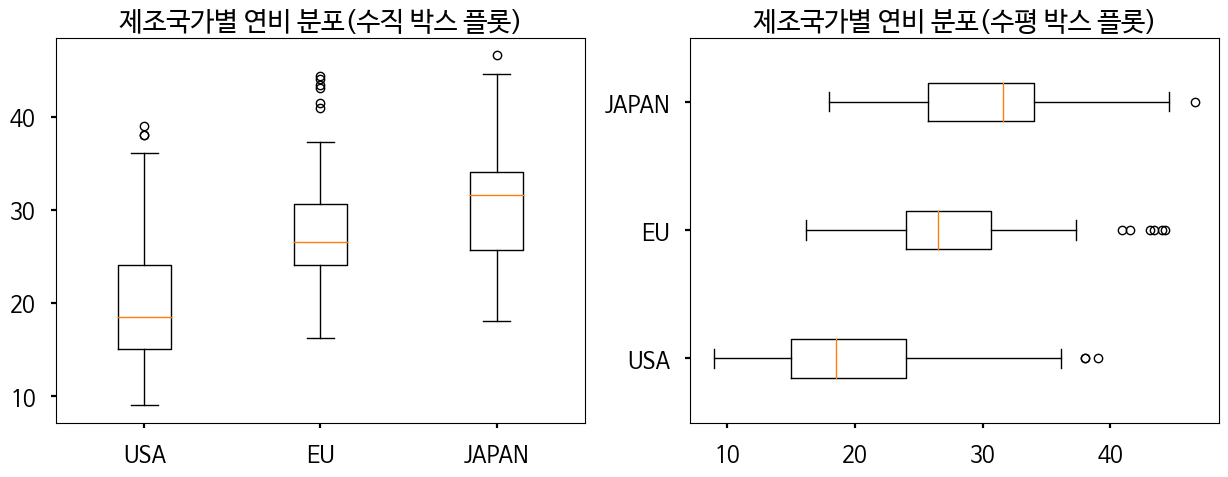

In [ ]:
plt.style.use('seaborn-poster') # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False # 마이너스 부호 출력 설정

# read_csv() 함수로 df 생성
df=pd.read_csv('/content/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
            'acceleration', 'model year', 'origin', 'name']

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig=plt.figure(figsize=(15, 5))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메소드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
            df[df['origin']==2]['mpg'],
            df[df['origin']==3]['mpg']],
            labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA', 'EU', 'JAPAN'],
            vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

* 파이썬 그래프 갤러리

파이썬으로 그릴 수 있는 다양한 그래프와 설정 옵션을 참조할 수 있는 사이트(The Python Graph Gallery). 여러 가지 유용한 샘플과 실행 코드를 많이 담고 있다.

참고 : https://python-graph-gallery.com